# Лабораторная работа №1

## Подключаем необходимые модули

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Создадим класс в котрый будем соохранять функцию, ее производную, и вычислять ошибки по данной аппроксимации

In [2]:
class Comp_error_func:
    def __init__ (self, func_info):
        self.func = func_info[0]
        self.diff = func_info[1]
    
    def get_errors_with_approx (self, point, approx, steps):
        return np.fabs (self.diff (point) - list(map(lambda x : approx(self.func, point, x), steps)))


## Выпишем нужные аппроксимации:
- $\frac{f(x + h) - f(x)}{h}$
- $\frac{f(x) - f(x - h)}{h}$
- $\frac{f(x + h) - f(x - h)}{2h}$
- $\frac{4}{3}\frac{f(x + h) - f(x - h)}{2h} - \frac{1}{3}\frac{f(x + 2h) - f(x - 2h)}{4h}$
- $\frac{3}{2}\frac{f(x + h) - f(x - h)}{2h} - \frac{3}{5}\frac{f(x + 2h) - f(x - 2h)}{4h} + \frac{1}{10}\frac{f(x + 3h) - f(x - 3h)}{6h}$

In [3]:
def first_approx (func, point, step):
    return (func(point + step) - func(point)) / step

def second_approx (func, point, step):
    return (func(point) - func(point - step)) / step

def third_approx (func, point, step):
    return (func(point + step) - func(point - step)) / (2 * step)

def fourth_approx (func, point, step):
    return  4 / 3 * third_approx (func, point, step) - \
            1 / 3 * third_approx (func, point, 2 * step)

def fifth_approx (func, point, step):
    return  3 / 2  * third_approx (func, point, step) -     \
            3 / 5  * third_approx (func, point, 2 * step) + \
            1 / 10 * third_approx (func, point, 3 * step)

approxes = [first_approx, second_approx, third_approx, fourth_approx, fifth_approx]

## Выпишем функции $\sin(x^2)$, $\cos(\sin(x))$, $\exp(\sin(\cos(x)))$, $\ln(x+3)$, $\sqrt{x+3}$ и их производные

In [4]:
def func1(x):
    return np.sin (x ** 2)

def diff_func1(x):
    return 2 * x * np.cos (x*x)

def func2(x):
    return np.cos (np.sin (x))

def diff_func2(x):
    return np.sin (np.sin (x)) * (-np.cos (x))

def func3(x):
    return np.exp (np.sin (np.cos (x)))

def diff_func3(x):
    return np.sin (x) * np.cos (np.cos (x)) * (-np.exp (np.sin (np.cos (x))))

def func4(x):
    return np.log (x + 3)

def diff_func4(x):
    return np.divide (1, (x+3))

def func5(x):
    return np.sqrt (x+3)

def diff_func5(x):
    return np.divide (1, (2 * np.sqrt (x + 3)))

func_arr = [func1, func2, func3, func4, func5]
diff_arr = [diff_func1, diff_func2, diff_func3, diff_func4, diff_func5]

func_and_diff_arr = list(zip(func_arr, diff_arr))
func_names = ['$\sin(x^2)$', '$\cos(\sin(x))$', '$\exp(\sin(\cos(x)))$', '$\ln(x+3)$', '$\sqrt{x+3}$']

## Будем считать погрешности в точке 42

In [5]:
x = 42.0

## Построим графики погрешностей

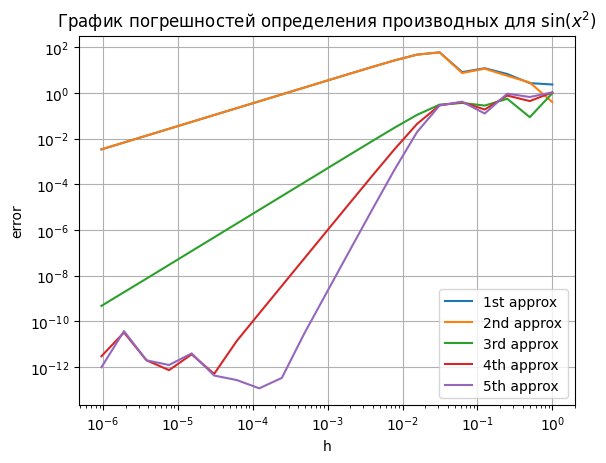

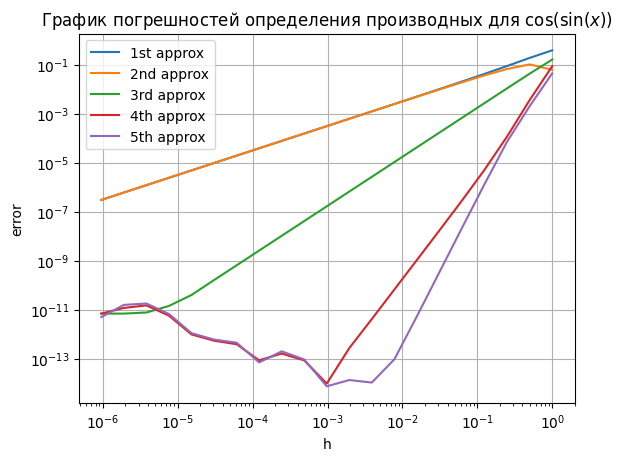

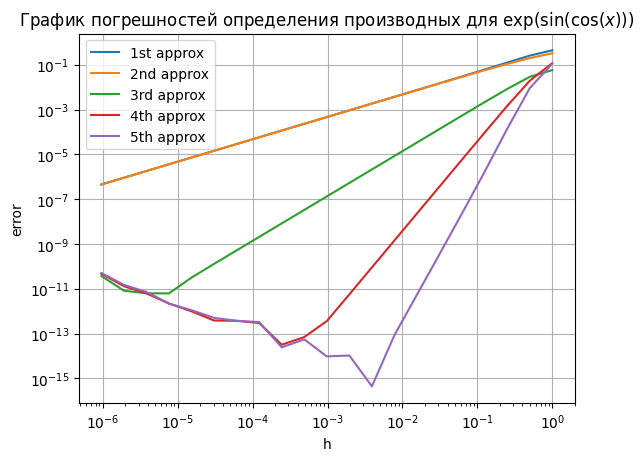

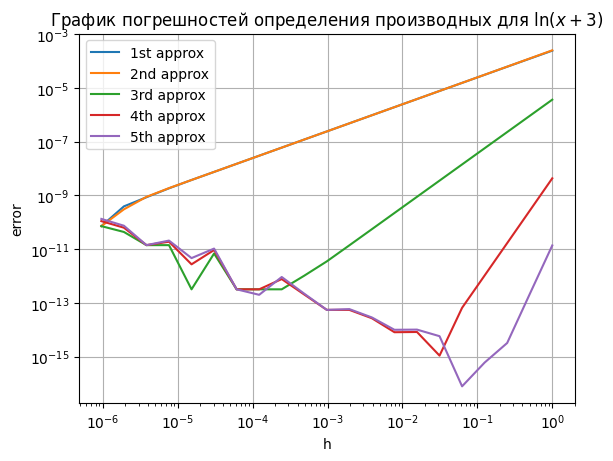

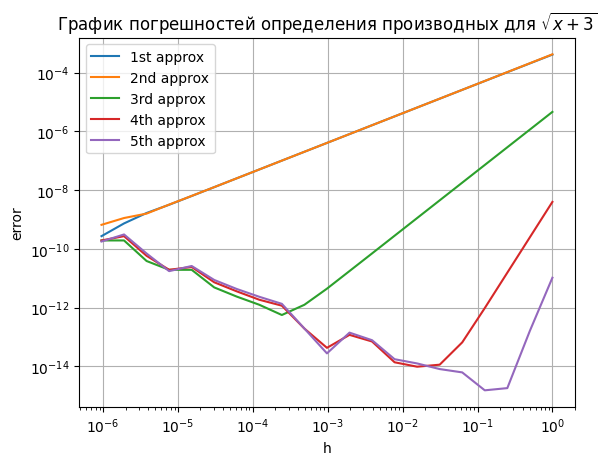

In [10]:
for i in range (0, 5):
    current = Comp_error_func(func_and_diff_arr[i])

    plt.yscale("log")
    plt.xscale("log")

    list(map(lambda approx_type : plt.plot(np.geomspace (1, 2 ** (-20), 21), \
             current.get_errors_with_approx(x, approx_type, np.geomspace (1, 2 ** (-20), 21))), approxes))
    
    plt.title('График погрешностей определения производных для ' + func_names[i])
    plt.legend(['1st approx', '2nd approx', '3rd approx', '4th approx', '5th approx'])
    plt.xlabel('h')
    plt.ylabel('error')
    plt.grid()
    plt.show()